In [24]:
from google.colab import files
papers = files.upload()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Saving topic_speech.csv to topic_speech (3).csv


In [25]:
import io
import pandas as pd

filename = next(iter(papers))
df = pd.read_csv(io.BytesIO(papers[filename]))

#Loading the df and checking if it has loaded properly
print(df.head())

                       party                                              id  \
0  Demokraattinen Vaihtoehto  http://ldf.fi/semparl/speeches/s1987_1_063_099   
1  Demokraattinen Vaihtoehto  http://ldf.fi/semparl/speeches/s1987_1_074_351   
2  Demokraattinen Vaihtoehto  http://ldf.fi/semparl/speeches/s1990_1_010_060   
3  Demokraattinen Vaihtoehto  http://ldf.fi/semparl/speeches/s1986_1_058_147   
4  Demokraattinen Vaihtoehto  http://ldf.fi/semparl/speeches/s1989_1_110_016   

                         Name  Birth   Death  gender Age.Group_Speech.  \
0  Stenius-Kaukonen, Marjatta   1947     NaN  Female             36-45   
1        Tennilä, Esko-Juhani   1947  2024.0    Male             36-45   
2                Laine, Ensio   1927  2021.0    Male             56-65   
3  Stenius-Kaukonen, Marjatta   1947     NaN  Female             36-45   
4    Löyttyjärvi, Marja-Liisa   1949     NaN  Female             36-45   

      Period Speech.Length       keyword  \
0  1960-2000         Short  va

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [26]:
speech = df.dropna(subset=['content_remove_stem'])
speech = speech['content_remove_stem']
speech.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0     herra puhemies ed ahonen annetulla esitys vall...
1     osattoma pärjääa väliin suojella etuoikeutettu...
3     pakote vastaus vuosi taivuttaa etelä-afrikka h...
4     perusturva alhainen taso palvelurakes ongelma ...
5     herra puhemies ed ahonen todeta kysymys mikään...
6     vasen mäntsälä kapina kaikki viedä maa vapaus ...
7     kansanvaltainen järjestelmä ed wiik kutsua esp...
8     kaikki kulua suoritetui roistontöi rikos toimi...
9     raskas elämänkohtalo tehdä päivä päivä raskaa ...
10    huomauttaa viittau päivä marraskuu anneta laki...
Name: content_remove_stem, dtype: object

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


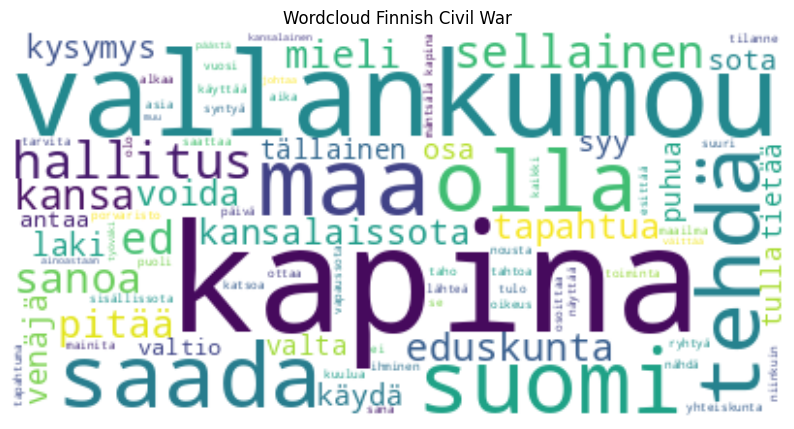

In [27]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# checking if speech is a Series and drop any NaN values
long_string = ','.join(speech.dropna().values)

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

wordcloud.generate(long_string)

# Display
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Wordcloud Finnish Civil War')
plt.axis('off')
plt.show()


In [28]:
import os
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

def generate_wordcloud_by_group(df, text_column, group_column, folder_path='./wordclouds/'):
    """
    Generate word clouds by groups and save them as images.

    Parameters:
    df (DataFrame): The dataframe containing the text data.
    text_column (str): Column name containing the text.
    group_column (str): Column name to group the text by.
    folder_path (str): Directory path to save word cloud images.
    """
    # Ensure the directory exists
    os.makedirs(folder_path, exist_ok=True)

    unique_values = df[group_column].unique()

    for value in unique_values:
        # Create subset and prepare text
        subset = df[df[group_column] == value].dropna(subset=[text_column])
        long_string = ','.join(subset[text_column].values)

        if not long_string:  # Check if the string is empty
            continue

        # Create a WordCloud object
        wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
        wordcloud.generate(long_string)

        # Display
        plt.figure(figsize=(10, 7))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f'Wordcloud for {group_column} = {value}')
        plt.axis('off')

        # Save the image
        plt.savefig(os.path.join(folder_path, f'wordcloud_{group_column}_{value}.png'))
        plt.close()  # Close the figure to avoid display overlap in some environments

# Example usage
generate_wordcloud_by_group(df, 'content_remove_stem', 'gender', './wordclouds/')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [29]:
generate_wordcloud_by_group(df, 'content_remove_stem', 'Period', './wordclouds2/')
generate_wordcloud_by_group(df, 'content_remove_stem', 'kapina', './wordclouds2/')
generate_wordcloud_by_group(df, 'content_remove_stem', 'gender', './wordclouds2/')
generate_wordcloud_by_group(df, 'content_remove_stem', 'Age.Group_Speech.', './wordclouds2/')
generate_wordcloud_by_group(df, 'content_remove_stem', 'vallankumous', './wordclouds2/')
generate_wordcloud_by_group(df, 'content_remove_stem', 'ideology', './wordclouds2/')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
!pip install pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 8.8 MB/s eta 0:00:00


In [ ]:
import numpy as np
np.random.seed(2)


import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords') # not required since Mahdi already removed them and performed lemmatization as well!
from nltk.corpus import stopwords # not required since Mahdi already removed them and performed lemmatization as well!


#Checking structure.
for entry in speech.head():
    print(type(entry), entry)

import gensim
import gensim.corpora as corpora
from gensim.models import LdaMulticore
from pprint import pprint
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis  # Updated import for the latest pyLDAvis version
import pickle
import os

# String in the Series to a list of words
data_words = [entry.split() for entry in speech.dropna()]
id2word = corpora.Dictionary(data_words)

# List of term-document frequency
corpus = [id2word.doc2bow(text) for text in data_words]


# Setting topics
num_topics = 4

# Build LDA model using LdaMulticore
lda_model = LdaMulticore(corpus=corpus, id2word=id2word, num_topics=num_topics)
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]



# Creating viz saving directory to make so we can access the results later in .html format
os.makedirs('./results/', exist_ok=True)

# Visualizing the topics
pyLDAvis.enable_notebook()

# defining saving path
LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_' + str(num_topics))

# Creating and saving the viz
if not os.path.exists(LDAvis_data_filepath):
    LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

html_path = './results/ldavis_prepared_' + str(num_topics) + '.html'
pyLDAvis.save_html(LDAvis_prepared, html_path)

# View
LDAvis_prepared



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<class 'str'> parlamentti jatkua nähtävästi mennä täysi vauhti marxilaispuolue vetää mennä käänne v nurja puoli nimittäin punainen kapina sisällöltänsä sellainen kajo mielellä hallitus aloite tuoda rikkomuksinen esitys pakko palata raskas rikos yksikään vapautta kunnioittaa maa sellainen tekijä armahtaa teko sitäpaitsi katua valitaa kapina onnistua erehdys valio#kunta luonnollisesti tutkia millainen herra tokoin aseellinen toiminta muurmanni kohtalokkkaasti vaikuttaa m
<class 'str'> painaa korkea kirjaima sos.dem pää-äänenkannaitaja etusivu ylistys sveita sotaväki siirtyä kansa tahtoa sanoa kapinallinen puoli ed aaltonen entäs suomi mäntsälä kapina tä voida tapahtua luotettava maa puolustusväki siitä vasen sellainen viha maanpuolustus huomata
<class 'str'> aattei tämä päteä ranskalainen viisaus oppositio käyttäytyä valta päästä päinvastoin oppositio olla vaatia maassa tapahtua tietynlainen vallankumous kokoomus kenttä seurata pelonsekaisin tuntea mielenkiinto kokoomus toiminta kokoomus

[(0,
  '0.020*"kapina" + 0.010*"vallankumous" + 0.006*"suomi" + 0.006*"maa" + '
  '0.004*"saada" + 0.004*"tapahtua" + 0.004*"kansa" + 0.004*"tehdä" + '
  '0.004*"sanoa" + 0.004*"hallitus"'),
 (1,
  '0.020*"vallankumous" + 0.013*"kapina" + 0.009*"ed" + 0.008*"suomi" + '
  '0.008*"maa" + 0.006*"saada" + 0.006*"tapahtua" + 0.006*"olla" + '
  '0.006*"tehdä" + 0.005*"sellainen"'),
 (2,
  '0.028*"kapina" + 0.009*"vallankumous" + 0.007*"hallitus" + 0.007*"ed" + '
  '0.006*"maa" + 0.006*"suomi" + 0.006*"saada" + 0.006*"tehdä" + 0.006*"olla" '
  '+ 0.005*"venäjä"'),
 (3,
  '0.016*"kapina" + 0.016*"vallankumous" + 0.006*"olla" + 0.006*"saada" + '
  '0.006*"tehdä" + 0.006*"maa" + 0.005*"kansa" + 0.004*"hallitus" + '
  '0.004*"sellainen" + 0.004*"suomi"')]


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.023220 -0.019195       1        1  31.713470
1      0.037264 -0.008625       2        1  27.317339
3     -0.008676 -0.007571       3        1  24.433513
0     -0.005368  0.035391       4        1  16.535679, topic_info=             Term         Freq        Total Category  logprob  loglift
9          kapina  1002.000000  1002.000000  Default  30.0000  30.0000
103  vallankumous   709.000000   709.000000  Default  29.0000  29.0000
609         päivä    95.000000    95.000000  Default  28.0000  28.0000
53             ed   285.000000   285.000000  Default  27.0000  27.0000
75       tapahtua   200.000000   200.000000  Default  26.0000  26.0000
..            ...          ...          ...      ...      ...      ...
53             ed    23.337724   285.430882   Topic4  -5.8876  -0.7043
88           olla    22.315783   271.175840   Topic4  -5.9324  -0.6978
63       mäntsälä    16.375876   107.310739   Topic4  -6.2418  -0.0803
412           syy    16.045969   111.532285   Topic4  -6.2622  -0.1392
442    edus#kunta    15.482552   152.567835   Topic4  -6.2979  -0.4882

[349 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
1116      1  0.246495            NA
1116      2  0.215683            NA
1116      3  0.246495            NA
1116      4  0.308118            NA
7854      4  0.464645  aatelissäädy
...     ...       ...           ...
489       4  0.117820      ymmärtää
329       1  0.184569       yrittää
329       2  0.258396       yrittää
329       3  0.442965       yrittää
329       4  0.147655       yrittää

[618 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 4, 1])

In [30]:
import os
import pickle
import gensim
import gensim.corpora as corpora
from gensim.models import LdaMulticore
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

def generate_lda_html_by_group(df, text_column, group_column, num_topics, folder_path='./results/'):
    # Ensure the directory exists
    os.makedirs(folder_path, exist_ok=True)

    unique_values = df[group_column].unique()

    for value in unique_values:
        subset = df[df[group_column] == value].dropna(subset=[text_column])
        data_words = [entry.split() for entry in subset[text_column]]

        if not data_words:  # Check if data_words is empty
            continue

        id2word = corpora.Dictionary(data_words)
        corpus = [id2word.doc2bow(text) for text in data_words]

        # Build LDA model
        lda_model = LdaMulticore(corpus=corpus, id2word=id2word, num_topics=num_topics)
        print(f"Topics for {group_column} = {value}:")
        print(lda_model.print_topics(num_words=5))  # Print top 5 words per topic for a quick check

        # Prepare LDA visualization
        LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)

        # Save the visualization as HTML
        html_path = os.path.join(folder_path, f'ldavis_{group_column}_{value}_topics_{num_topics}.html')
        pyLDAvis.save_html(LDAvis_prepared, html_path)
        print(f"LDA visualization saved to {html_path}")


generate_lda_html_by_group(df, 'content_remove_stem', 'gender', num_topics=4, folder_path='./results2/')
generate_lda_html_by_group(df, 'content_remove_stem', 'Period', num_topics=4, folder_path='./results2/')
generate_lda_html_by_group(df, 'content_remove_stem', 'kapina', num_topics=4, folder_path='./results2/')
generate_lda_html_by_group(df, 'content_remove_stem', 'Age.Group_Speech.', num_topics=4, folder_path='./results2/')
generate_lda_html_by_group(df, 'content_remove_stem', 'vallankumous', num_topics=4, folder_path='./results2/')
generate_lda_html_by_group(df, 'content_remove_stem', 'ideology', num_topics=4, folder_path='./results2/')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topics for gender = Female:
[(0, '0.010*"kapina" + 0.007*"ed" + 0.005*"sisällissota" + 0.005*"hallitus" + 0.005*"maa"'), (1, '0.012*"kapina" + 0.011*"vallankumous" + 0.006*"maa" + 0.006*"suomi" + 0.006*"nousta"'), (2, '0.010*"vallankumous" + 0.010*"kapina" + 0.007*"suomi" + 0.007*"ed" + 0.005*"maa"'), (3, '0.012*"vallankumous" + 0.009*"kapina" + 0.006*"suomi" + 0.005*"tapahtua" + 0.005*"maa"')]
LDA visualization saved to ./results2/ldavis_gender_Female_topics_4.html


Topics for gender = Male:
[(0, '0.018*"kapina" + 0.017*"vallankumous" + 0.008*"maa" + 0.007*"venäjä" + 0.007*"suomi"'), (1, '0.026*"kapina" + 0.013*"vallankumous" + 0.007*"tehdä" + 0.006*"saada" + 0.006*"maa"'), (2, '0.023*"kapina" + 0.012*"vallankumous" + 0.007*"ed" + 0.006*"suomi" + 0.006*"olla"'), (3, '0.016*"vallankumous" + 0.013*"kapina" + 0.008*"suomi" + 0.008*"maa" + 0.006*"hallitus"')]


LDA visualization saved to ./results2/ldavis_gender_Male_topics_4.html
Topics for Period = 1960-2000:
[(0, '0.012*"kapina" + 0.011*"vallankumous" + 0.008*"ed" + 0.006*"maa" + 0.006*"sellainen"'), (1, '0.017*"vallankumous" + 0.011*"kapina" + 0.009*"ed" + 0.006*"maa" + 0.006*"hallitus"'), (2, '0.021*"vallankumous" + 0.007*"kapina" + 0.006*"ed" + 0.006*"hallitus" + 0.005*"saada"'), (3, '0.018*"vallankumous" + 0.010*"kapina" + 0.009*"ed" + 0.008*"kansa" + 0.007*"suomi"')]


LDA visualization saved to ./results2/ldavis_Period_1960-2000_topics_4.html
Topics for Period = 1920-1960:
[(0, '0.020*"kapina" + 0.010*"vallankumous" + 0.006*"kansalaissota" + 0.006*"maa" + 0.006*"hallitus"'), (1, '0.033*"kapina" + 0.009*"vallankumous" + 0.008*"ed" + 0.007*"olla" + 0.007*"mäntsälä"'), (2, '0.012*"kapina" + 0.009*"vallankumous" + 0.007*"saada" + 0.007*"kansalaissota" + 0.005*"olla"'), (3, '0.027*"kapina" + 0.011*"vallankumous" + 0.009*"olla" + 0.007*"sellainen" + 0.007*"maa"')]


LDA visualization saved to ./results2/ldavis_Period_1920-1960_topics_4.html
Topics for Period = Civil_War:
[(0, '0.019*"kapina" + 0.013*"maa" + 0.013*"suomi" + 0.012*"vallankumous" + 0.007*"venäjä"'), (1, '0.017*"kapina" + 0.009*"maa" + 0.006*"saada" + 0.005*"kukistaa" + 0.004*"suomi"'), (2, '0.033*"kapina" + 0.008*"vallankumous" + 0.008*"maa" + 0.007*"saada" + 0.006*"suomi"'), (3, '0.029*"kapina" + 0.009*"maa" + 0.009*"kansa" + 0.009*"saada" + 0.009*"suomi"')]


LDA visualization saved to ./results2/ldavis_Period_Civil_War_topics_4.html
Topics for Period = 2001-Present:
[(0, '0.013*"vallankumous" + 0.009*"sisällissota" + 0.009*"suomi" + 0.007*"maa" + 0.007*"puhemies"'), (1, '0.011*"vallankumous" + 0.008*"sisällissota" + 0.005*"kapina" + 0.005*"tapahtua" + 0.005*"suomi"'), (2, '0.014*"vallankumous" + 0.012*"suomi" + 0.009*"puhemies" + 0.009*"sisällissota" + 0.009*"arvoisa"'), (3, '0.011*"vallankumous" + 0.010*"suomi" + 0.008*"sisällissota" + 0.007*"maa" + 0.007*"puhemies"')]


LDA visualization saved to ./results2/ldavis_Period_2001-Present_topics_4.html
Topics for kapina = 0.0:
[(0, '0.016*"vallankumous" + 0.011*"kapina" + 0.009*"suomi" + 0.007*"kansalaissota" + 0.007*"ed"'), (1, '0.023*"vallankumous" + 0.008*"suomi" + 0.007*"maa" + 0.006*"hallitus" + 0.005*"tehdä"'), (2, '0.026*"vallankumous" + 0.008*"tapahtua" + 0.008*"maa" + 0.006*"suomi" + 0.006*"venäjä"'), (3, '0.021*"vallankumous" + 0.008*"ed" + 0.008*"kapina" + 0.006*"saada" + 0.006*"tehdä"')]
LDA visualization saved to ./results2/ldavis_kapina_0.0_topics_4.html


Topics for kapina = 1.0:
[(0, '0.042*"kapina" + 0.008*"ed" + 0.008*"olla" + 0.006*"saada" + 0.006*"sellainen"'), (1, '0.035*"kapina" + 0.007*"hallitus" + 0.007*"saada" + 0.005*"suomi" + 0.005*"mäntsälä"'), (2, '0.038*"kapina" + 0.008*"hallitus" + 0.008*"maa" + 0.006*"tehdä" + 0.005*"olla"'), (3, '0.038*"kapina" + 0.007*"saada" + 0.007*"hallitus" + 0.006*"sellainen" + 0.006*"olla"')]


LDA visualization saved to ./results2/ldavis_kapina_1.0_topics_4.html
Topics for Age.Group_Speech. = 36-45:
[(0, '0.021*"kapina" + 0.009*"vallankumous" + 0.006*"maa" + 0.006*"tehdä" + 0.005*"olla"'), (1, '0.018*"kapina" + 0.012*"vallankumous" + 0.008*"suomi" + 0.007*"saada" + 0.007*"olla"'), (2, '0.019*"kapina" + 0.018*"vallankumous" + 0.009*"saada" + 0.008*"ed" + 0.008*"maa"'), (3, '0.013*"kapina" + 0.013*"vallankumous" + 0.008*"hallitus" + 0.006*"suomi" + 0.005*"kansa"')]


LDA visualization saved to ./results2/ldavis_Age.Group_Speech._36-45_topics_4.html
Topics for Age.Group_Speech. = 56-65:
[(0, '0.025*"kapina" + 0.010*"vallankumous" + 0.007*"suomi" + 0.006*"tehdä" + 0.005*"maa"'), (1, '0.015*"vallankumous" + 0.011*"kapina" + 0.009*"kansa" + 0.007*"maa" + 0.007*"suomi"'), (2, '0.013*"kapina" + 0.012*"vallankumous" + 0.008*"hallitus" + 0.006*"saada" + 0.006*"ed"'), (3, '0.018*"kapina" + 0.016*"vallankumous" + 0.008*"tehdä" + 0.006*"suomi" + 0.006*"maa"')]


LDA visualization saved to ./results2/ldavis_Age.Group_Speech._56-65_topics_4.html
Topics for Age.Group_Speech. = 46-55:
[(0, '0.021*"kapina" + 0.014*"vallankumous" + 0.007*"ed" + 0.007*"saada" + 0.007*"suomi"'), (1, '0.026*"kapina" + 0.009*"vallankumous" + 0.009*"hallitus" + 0.007*"suomi" + 0.006*"maa"'), (2, '0.015*"kapina" + 0.010*"vallankumous" + 0.007*"olla" + 0.007*"suomi" + 0.006*"tehdä"'), (3, '0.013*"vallankumous" + 0.013*"kapina" + 0.006*"ed" + 0.005*"tehdä" + 0.005*"tapahtua"')]


LDA visualization saved to ./results2/ldavis_Age.Group_Speech._46-55_topics_4.html
Topics for Age.Group_Speech. = 25-35:
[(0, '0.018*"vallankumous" + 0.013*"kapina" + 0.006*"ed" + 0.006*"maa" + 0.005*"tehdä"'), (1, '0.016*"vallankumous" + 0.011*"maa" + 0.010*"kapina" + 0.007*"venäjä" + 0.007*"suomi"'), (2, '0.019*"kapina" + 0.015*"vallankumous" + 0.011*"maa" + 0.007*"olla" + 0.005*"porvaristo"'), (3, '0.015*"kapina" + 0.015*"vallankumous" + 0.006*"saada" + 0.006*"suomi" + 0.006*"maa"')]


LDA visualization saved to ./results2/ldavis_Age.Group_Speech._25-35_topics_4.html
Topics for Age.Group_Speech. = 66+:
[(0, '0.019*"kapina" + 0.010*"suomi" + 0.008*"vallankumous" + 0.007*"hallitus" + 0.006*"kansa"'), (1, '0.019*"kapina" + 0.011*"suomi" + 0.008*"vallankumous" + 0.008*"rikoslaki" + 0.007*"vastustaminen"'), (2, '0.008*"kapina" + 0.008*"vallankumous" + 0.007*"pitää" + 0.006*"käyttö" + 0.005*"esittää"'), (3, '0.016*"kapina" + 0.011*"suomi" + 0.010*"hallitus" + 0.008*"tehdä" + 0.008*"vallankumous"')]


LDA visualization saved to ./results2/ldavis_Age.Group_Speech._66+_topics_4.html
Topics for vallankumous = 1.0:
[(0, '0.037*"vallankumous" + 0.007*"tapahtua" + 0.007*"ed" + 0.007*"suomi" + 0.005*"maa"'), (1, '0.026*"vallankumous" + 0.006*"tehdä" + 0.006*"ed" + 0.004*"suomi" + 0.004*"venäjä"'), (2, '0.028*"vallankumous" + 0.010*"venäjä" + 0.008*"suomi" + 0.006*"kansa" + 0.005*"sanoa"'), (3, '0.035*"vallankumous" + 0.008*"suomi" + 0.007*"kansa" + 0.007*"tehdä" + 0.006*"ed"')]


LDA visualization saved to ./results2/ldavis_vallankumous_1.0_topics_4.html
Topics for vallankumous = 0.0:
[(0, '0.030*"kapina" + 0.006*"maa" + 0.006*"suomi" + 0.005*"olla" + 0.005*"sellainen"'), (1, '0.037*"kapina" + 0.010*"hallitus" + 0.009*"maa" + 0.008*"olla" + 0.007*"saada"'), (2, '0.019*"kapina" + 0.005*"maa" + 0.005*"ed" + 0.005*"sota" + 0.004*"kansalaissota"'), (3, '0.020*"kapina" + 0.008*"kansalaissota" + 0.008*"saada" + 0.008*"tehdä" + 0.007*"sellainen"')]


LDA visualization saved to ./results2/ldavis_vallankumous_0.0_topics_4.html
Topics for ideology = Left:
[(0, '0.014*"kapina" + 0.014*"vallankumous" + 0.013*"ed" + 0.006*"hallitus" + 0.006*"suomi"'), (1, '0.010*"kapina" + 0.007*"maa" + 0.006*"suomi" + 0.006*"sota" + 0.005*"käydä"'), (2, '0.016*"vallankumous" + 0.008*"ed" + 0.007*"kapina" + 0.007*"maa" + 0.006*"saada"'), (3, '0.015*"kapina" + 0.011*"vallankumous" + 0.008*"maa" + 0.006*"olla" + 0.006*"suomi"')]


LDA visualization saved to ./results2/ldavis_ideology_Left_topics_4.html
Topics for ideology = Right:
[(0, '0.020*"kapina" + 0.011*"vallankumous" + 0.009*"ed" + 0.006*"suomi" + 0.005*"tapahtua"'), (1, '0.016*"kapina" + 0.015*"vallankumous" + 0.007*"maa" + 0.006*"tehdä" + 0.006*"ed"'), (2, '0.025*"kapina" + 0.007*"saada" + 0.006*"hallitus" + 0.006*"maa" + 0.006*"sellainen"'), (3, '0.015*"vallankumous" + 0.013*"kapina" + 0.007*"saada" + 0.007*"suomi" + 0.006*"maa"')]


LDA visualization saved to ./results2/ldavis_ideology_Right_topics_4.html
Topics for ideology = Center:
[(0, '0.020*"kapina" + 0.012*"vallankumous" + 0.008*"saada" + 0.007*"maa" + 0.007*"tehdä"'), (1, '0.018*"vallankumous" + 0.016*"kapina" + 0.007*"suomi" + 0.006*"kansa" + 0.005*"olla"'), (2, '0.022*"kapina" + 0.013*"vallankumous" + 0.009*"suomi" + 0.006*"ed" + 0.005*"kansa"'), (3, '0.018*"kapina" + 0.017*"vallankumous" + 0.008*"maa" + 0.007*"hallitus" + 0.006*"tehdä"')]
LDA visualization saved to ./results2/ldavis_ideology_Center_topics_4.html


In [8]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

# Preparing data for LDA
text_data = df['content_remove_stem'].dropna()
vectorizer = CountVectorizer(stop_words='english', max_features=1000)
data_vectorized = vectorizer.fit_transform(text_data)

# Create and fit LDA model
lda_model = LatentDirichletAllocation(n_components=5, random_state=0)
lda_model.fit(data_vectorized)

# Function to display topics from the LDA model
def display_topics(model, feature_names, no_top_words):
    topic_dict = {}
    for topic_idx, topic in enumerate(model.components_):
        topic_dict["Topic %d" % (topic_idx+1)] = " ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]])
    return topic_dict

# Displaying the topics
topics = display_topics(lda_model, vectorizer.get_feature_names_out(), 10)
topics


{'Topic 1': 'vallankumous suomi venäjä maa kansa hallitus eduskunta saada sisällissota ed',
 'Topic 2': 'kapina olla hallitus laki mäntsälä saada sellainen ed tehdä mieli',
 'Topic 3': 'vallankumous kapina maa ed suomi tehdä syntyä yhteiskunta tulla puhemies',
 'Topic 4': 'kapina vallankumous tehdä ed sellainen voida maa sanoa kansa saada',
 'Topic 5': 'vallankumous tapahtua saada pitää kansalaissota maa olla valtio tehdä sanoa'}

In [31]:
import os
import pandas as pd
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

def generate_lda_html_by_group_sklearn(df, text_column, group_column, num_topics, folder_path='./results/'):
    """
    Generate LDA visualizations by groups using sklearn's LDA and save them as HTML files.

    Parameters:
    df (DataFrame): The dataframe containing the text data.
    text_column (str): Column name containing the text.
    group_column (str): Column name to group the text by.
    num_topics (int): Number of topics to generate in the LDA model.
    folder_path (str): Directory path to save HTML visualizations.
    """
    # Ensure the directory exists
    os.makedirs(folder_path, exist_ok=True)

    unique_values = df[group_column].unique()

    for value in unique_values:
        subset = df[df[group_column] == value].dropna(subset=[text_column])
        text_data = subset[text_column]

        if text_data.empty:
            continue

        # Vectorizing text data
        vectorizer = CountVectorizer(stop_words='english', max_features=1000)
        data_vectorized = vectorizer.fit_transform(text_data)

        # Creating and fitting the LDA model
        lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=0)
        lda_model.fit(data_vectorized)

        # Function to create a dictionary of topics
        def display_topics(model, feature_names, no_top_words):
            topic_dict = {}
            for topic_idx, topic in enumerate(model.components_):
                topic_dict[f"Topic {topic_idx+1}"] = " ".join([feature_names[i]
                                  for i in topic.argsort()[:-no_top_words - 1:-1]])
            return topic_dict

        # Generating topics
        topics = display_topics(lda_model, vectorizer.get_feature_names_out(), 5)
        print(f"Topics for {group_column} = {value}:")
        print(topics)

        # Normally, sklearn LDA does not support direct HTML visualization like gensim.
        # Here, you would save or handle the topics dictionary as needed, perhaps logging to a file or creating custom visualizations.
        # Since sklearn doesn't provide HTML visualization directly, you might consider using libraries like matplotlib, seaborn, or others to visualize the topic distributions.

# Example usage
generate_lda_html_by_group_sklearn(df, 'content_remove_stem', 'gender', num_topics=4, folder_path='./results3/')
generate_lda_html_by_group_sklearn(df, 'content_remove_stem', 'Period', num_topics=4, folder_path='./results3/')
generate_lda_html_by_group_sklearn(df, 'content_remove_stem', 'kapina', num_topics=4, folder_path='./results3/')
generate_lda_html_by_group_sklearn(df, 'content_remove_stem', 'Age.Group_Speech.', num_topics=4, folder_path='./results3/')
generate_lda_html_by_group_sklearn(df, 'content_remove_stem', 'vallankumous', num_topics=4, folder_path='./results3/')
generate_lda_html_by_group_sklearn(df, 'content_remove_stem', 'ideology', num_topics=4, folder_path='./results3/')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topics for gender = Female:
{'Topic 1': 'kapina ed vallankumous tehdä osa', 'Topic 2': 'suomi vallankumous kapina tapahtua hallitus', 'Topic 3': 'vallankumous kapina sanoa eduskunta nähdä', 'Topic 4': 'vallankumous kapina ed maa saada'}
Topics for gender = Male:
{'Topic 1': 'kapina vallankumous suomi saada maa', 'Topic 2': 'kapina hallitus ed mäntsälä olla', 'Topic 3': 'vallankumous ed tehdä suomi maa', 'Topic 4': 'kapina sota kansalaissota maa suomi'}
Topics for Period = 1960-2000:
{'Topic 1': 'vallankumous kapina linja mieli maa', 'Topic 2': 'vallankumous ed ihminen kansa maa', 'Topic 3': 'kapina ed vallankumous suomi hallitus', 'Topic 4': 'vallankumous hallitus maa kapina suomi'}
Topics for Period = 1920-1960:
{'Topic 1': 'kapina vallankumous ed suomi hallitus', 'Topic 2': 'vallankumous sota laki kapina sotatila', 'Topic 3': 'kapina mäntsälä saada maa tapahtua', 'Topic 4': 'kansalaissota porvaristo maa vallankumous tehdä'}
Topics for Period = Civil_War:
{'Topic 1': 'vallankumous hal